Estimated p (Innovation): 0.0049
Estimated q (Imitation): 0.5724
Estimated m (Market Potential): 1426


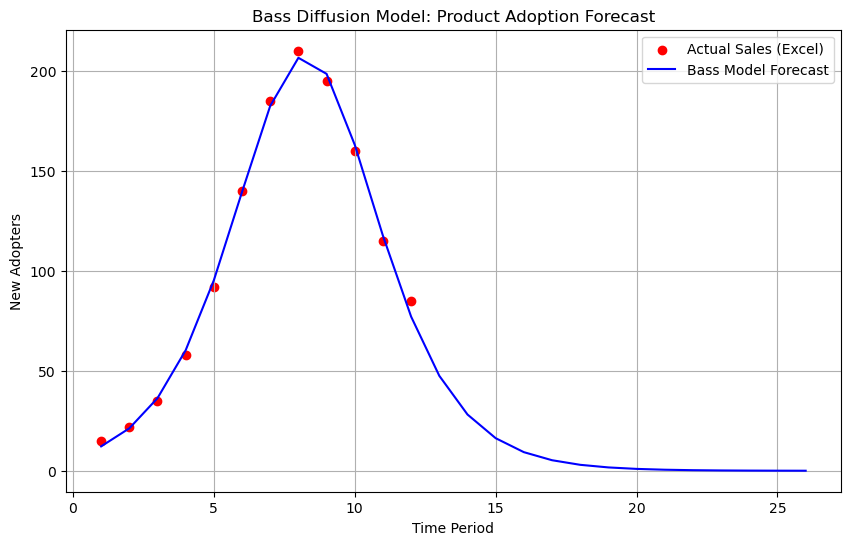

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_excel('sales_data.xlsx')  # pulls data from the excel file and reads it in a variable called df
actual_sales = df['Sales'].values # assigns values fro the column with header named 'sales' and use .values to convert it to a list of numbers
t = np.arange(1, len(actual_sales) + 1)  # len counts the number of data points and returns 12+1 to arange, which then stops before 13

# 2. Define the Bass Diffusion Function
def bass_model(t, p, q, m): # defining variables
    """
    p: Coefficient of innovation
    q: Coefficient of imitation
    m: Market potential (total number of adopters)
    """
    # Cumulative Adopters A(t) formula
    A_t = m * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))
    
    # Non-cumulative sales S(t) is the derivative of A(t)
    # This matches the "Sales" column in Excel
    S_t = m * ( ((p + q)**2 / p) * np.exp(-(p + q) * t) ) / (1 + (q / p) * np.exp(-(p + q) * t))**2
    return S_t

# 3. Fit the model to your Excel data
# Initial guesses: p=0.03, q=0.38, m=max sales * 10
initial_guess = [0.03, 0.38, max(actual_sales) * 5]

params, covariance = curve_fit(bass_model, t, actual_sales, p0=initial_guess)  # params is a list containing optimized p,q and m values; covariance matrix tells how much uncertainity is there in those numbers
# curve_fit('template', X, y, p0='starting pt'
p_fit, q_fit, m_fit = params # this is called unpacking, it assigns the list of results to a set of simple variables
# p_fit: internal sales drive; q_fit: External sales drive; m_fit: Max ppl who will buy

print(f"Estimated p (Innovation): {p_fit:.4f}")
print(f"Estimated q (Imitation): {q_fit:.4f}")
print(f"Estimated m (Market Potential): {int(m_fit)}")

# 4. Predict Future Sales
t_future = np.arange(1, len(actual_sales) + 15) # Predict 10 periods ahead
predicted_sales = bass_model(t_future, p_fit, q_fit, m_fit) #we recall the function, but with a longer timeline and optimized parameters

# 5. Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(t, actual_sales, color='red', label='Actual Sales (Excel)')
plt.plot(t_future, predicted_sales, label='Bass Model Forecast', color='blue')
plt.title('Bass Diffusion Model: Product Adoption Forecast')
plt.xlabel('Time Period')
plt.ylabel('New Adopters')
plt.legend()
plt.grid(True)
plt.show()